[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/seoul-bike-analysis/blob/master/time-series-forecast.ipynb)

# 시계열 분석
* 시계열 데이터 : 주가, 환율, 거래량, 판매량, 재고량, 수요량, 클릭률, 기온, 습도, 인구, 출생률, 트래픽양의 피크시간 패턴, 제품의 판매주기, 심장 박동
* 시계열 데이터의 특성을 파악
    * 규칙적 : 경향(trend), 계절성(seasonality), 주기(cycle)
    * 불규칙적 : 불규칙성(irregular, random)


* 추세 파악 
: 무작위 적인 소음을 제거하여 흐름을 파악
* 원인 예측 및 대응
: 수요 분석을 통한 재고량 관리
* 전망
: 영업 전략, 생산 계획




### 정상 시계열(stationary)
 * 뚜렷한 추세가 없음
 * 진폭이 흐름에 따라 일정함

### 비정상 시계열(non-stationary)
 * 평균이 시간대에 따라 다름
 * 추세, 계절성을 가짐
 * 분산이 변한다
 * 분산이 일정하지 않으면 특정 기간에 오류가 발생하고 예측을 하기에 적합하지 않을 수 있다.


### 비정상 시계열의 정상화


1. 분산이 일정하지 않은 경우 
 * 분산 안정화 변환(로그변환, 제곱근 변환, Box-Cox 변환)
2. 추세가 있을 때
 * 결정적 추세 : 분해법 또는 추세항 모형에 포함
 * 확률적 추세(Dickey-Fuller의 단위근 검정): 차분을 이용 Trend 제거
 * 로그변환(lograithm) : 표준편차가 자료의 크기에 비례 해서 증가 할 때
3. 계절성을 가지는 경우
 * 결정적 계절추세 : 계절 추세항 모형에 포함
 * 확률적 계절추세(계절형 단위근 검정) : 계절차분 
 

## 여의나루역(대여소 번호 207)에서 대여하거나 반납한 자전거의 이력을 분석
* 여의나루역은 같은 대여소에서 대여반납이 가장 많은 지역
* 대여 혹은 반납이 여의나루역인 데이터
* 2017년 1월부터 2019년 5월까지의 데이터를 사용

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')
%matplotlib inline

## Colab 에서 실행을 위한 코드

* https://colab.research.google.com/github/corazzon/seoul-bike-analysis/blob/master/time-series-forecast.ipynb
* 아래의 코드는 google colaboratory 에서 실행을 위한 코드로 로컬 아나콘다에서는 주석처리한다.
* google colaboratory 에서는 주석을 풀고 폰트 설정과 csv 파일을 불러온다.

In [2]:
# # 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# # 그래프에 retina display 적용
# %config InlineBackend.figure_format = 'retina'

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic') 

In [3]:
# # 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증을 한다.
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # PyDrive client 인증
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [4]:
# # 공유 가능한 링크로 파일 가져오기
# url ='https://drive.google.com/open?id=1ngU6y2Fl0cz6ckCuWvXSHKs5aLsh48TH'
# id = url.split('=')[1]
# print(id)
# downloaded = drive.CreateFile({'id':id}) 
# # data 폴더에 파일을 관리하며, 폴더가 없다면 만들어서 파일을 관리하도록 한다.
# %mkdir data
# downloaded.GetContentFile('data/bike-station-207.csv')  

## csv 파일로드

In [5]:
df = pd.read_csv("data/bike-station-207.csv", low_memory=False)
df.shape

(259149, 7)

In [6]:
df.head(3)

자전거번호SPB             대여일시  대여대여소번호             반납일시  반납대여소번호  이용시간(분)  \
0      4824  2017-01-01 1:25      224  2017-01-01 1:30      207        4   
1      4801  2017-01-01 5:19      224  2017-01-01 5:24      207        4   
2      4221  2017-01-01 8:55      221  2017-01-01 8:58      207        2   

   이용거리(M)  
0   1160.0  
1   1090.0  
2    790.0

In [7]:
df.tail(3)

자전거번호SPB                 대여일시  대여대여소번호                 반납일시  반납대여소번호  \
259146     19505  2019-05-31 22:51:02     1188  2019-06-01 01:01:13      207   
259147     18573  2019-05-31 23:45:22      207  2019-06-01 01:12:48      150   
259148     19293  2019-05-31 23:54:19      207  2019-06-01 01:15:26     1827   

        이용시간(분)  이용거리(M)  
259146      127  26830.0  
259147       80   6530.0  
259148       81  71770.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259149 entries, 0 to 259148
Data columns (total 7 columns):
자전거번호SPB    259149 non-null int64
대여일시        259149 non-null object
대여대여소번호     259149 non-null int64
반납일시        259149 non-null object
반납대여소번호     259149 non-null int64
이용시간(분)     259149 non-null int64
이용거리(M)     259149 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 13.8+ MB


In [9]:
df["대여연월"] = df["대여일시"].apply(lambda x : x[:7])
df["반납연월"] = df["반납일시"].apply(lambda x : x[:7])

In [10]:
# object 타입에는 .dt accessor를 사용할 수 없기 때문에
# 대여일시와 반납일시를 datetime 형태로 변환해 줍니다.
df["대여일시"] = pd.to_datetime(df["대여일시"])
df["반납일시"] = pd.to_datetime(df["반납일시"])

df[["대여일시", "반납일시"]].dtypes

대여일시    datetime64[ns]
반납일시    datetime64[ns]
dtype: object

In [11]:
df["대여연도"] = df["대여일시"].dt.year
df["대여월"] = df["대여일시"].dt.month
df["대여일"] = df["대여일시"].dt.day
df["대여시간"] = df["대여일시"].dt.hour
df["대여요일"] = df["대여일시"].dt.dayofweek
df["대여일자"] = df["대여일시"].dt.date

df.sample()

자전거번호SPB                대여일시  대여대여소번호                반납일시  반납대여소번호  \
257844     19043 2019-05-30 07:47:02      207 2019-05-30 07:51:09      218   

        이용시간(분)  이용거리(M)     대여연월     반납연월  대여연도  대여월  대여일  대여시간  대여요일  \
257844        3    670.0  2019-05  2019-05  2019    5   30     7     3   

              대여일자  
257844  2019-05-30

In [12]:
df["반납연도"] = df["반납일시"].dt.year
df["반납월"] = df["반납일시"].dt.month
df["반납일"] = df["반납일시"].dt.day
df["반납시간"] = df["반납일시"].dt.hour
df["반납요일"] = df["반납일시"].dt.dayofweek
df["반납일자"] = df["반납일시"].dt.date

df.sample()

자전거번호SPB                대여일시  대여대여소번호                반납일시  반납대여소번호  \
250991     11801 2019-05-20 23:17:14      207 2019-05-21 00:09:59      800   

        이용시간(분)  이용거리(M)     대여연월     반납연월  대여연도  ...  대여일  대여시간  대여요일  \
250991       49   3720.0  2019-05  2019-05  2019  ...   20    23     0   

              대여일자  반납연도  반납월  반납일  반납시간  반납요일        반납일자  
250991  2019-05-20  2019    5   21     0     1  2019-05-21  

[1 rows x 21 columns]

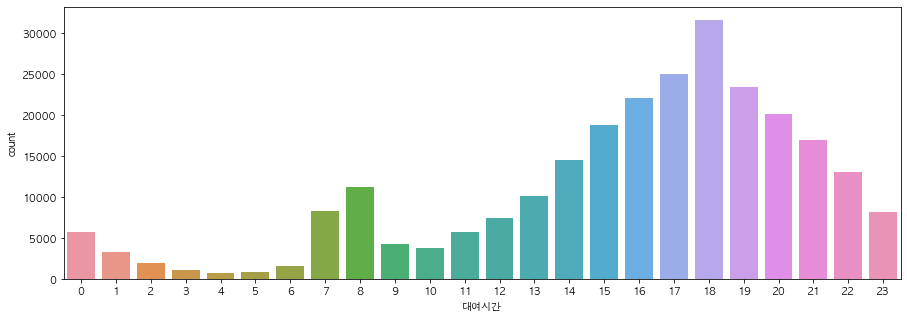

In [13]:
# 수치를 집계해보기 전에 countplot으로 분석해 본다.
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="대여시간")

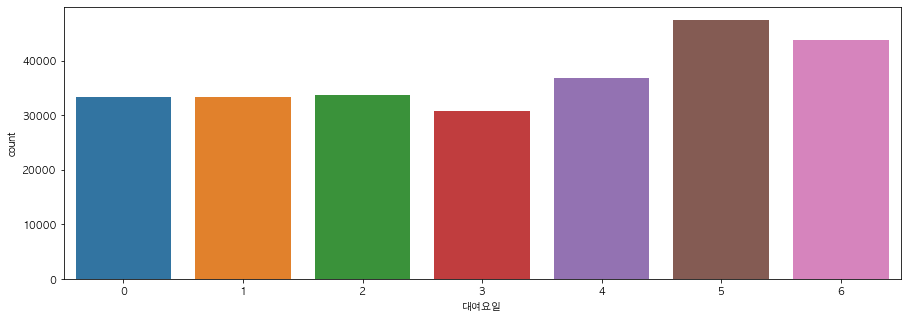

In [14]:
# 어느 요일에 자전거를 더 많이 타는지 비교해 본다.
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="대여요일")

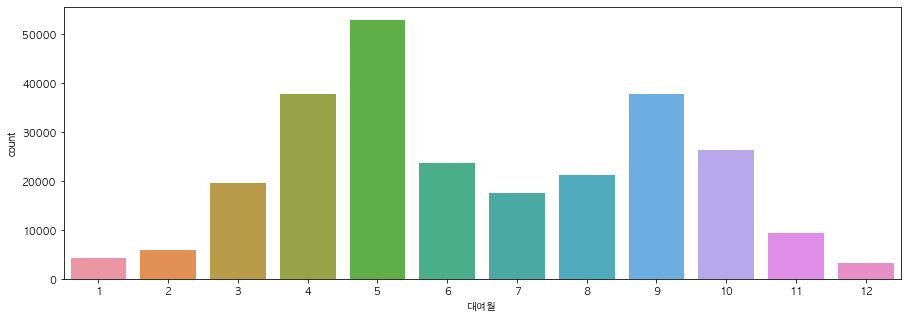

In [15]:
# 연도별 데이터를 보면 모든 월 데이터가 있지 않다. 따라서 count 값으로 시각화를 하는 것은 적절하지 않다.(평균이나 다른 수치로 보도록 한다.)
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="대여월")

### 시간대별 대여수량을 집계

In [16]:
# value 값은 "대여일시"로 넣어주었는데 어떤 컬럼을 넣어주어도 count값을 동일하게 구한다.
# 대여일자로 구하게 되면 reset_index()에서 컬럼명이 중복되기 때문에 오류가 발생해서 다른 컬럼으로 구해왔다.
df_rent_group = df.groupby(["대여일자", "대여연월", "대여연도", "대여월", "대여일", "대여요일"])["대여일시"].count()
df_rent_group.head()

대여일자        대여연월     대여연도  대여월  대여일  대여요일
2017-01-01  2017-01  2017  1    1    6       24
2017-01-02  2017-01  2017  1    2    0       34
2017-01-03  2017-01  2017  1    3    1       51
2017-01-04  2017-01  2017  1    4    2       56
2017-01-05  2017-01  2017  1    5    3       69
Name: 대여일시, dtype: int64

In [17]:
df_rent = pd.DataFrame(df_rent_group).reset_index()
df_rent.columns = ["대여일자", "대여연월", "대여연도", 
                   "대여월", "대여일", "대여요일", "대여수"]
df_rent.head()

대여일자     대여연월  대여연도  대여월  대여일  대여요일  대여수
0  2017-01-01  2017-01  2017    1    1     6   24
1  2017-01-02  2017-01  2017    1    2     0   34
2  2017-01-03  2017-01  2017    1    3     1   51
3  2017-01-04  2017-01  2017    1    4     2   56
4  2017-01-05  2017-01  2017    1    5     3   69

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2984e0b8>,
      dtype=object)

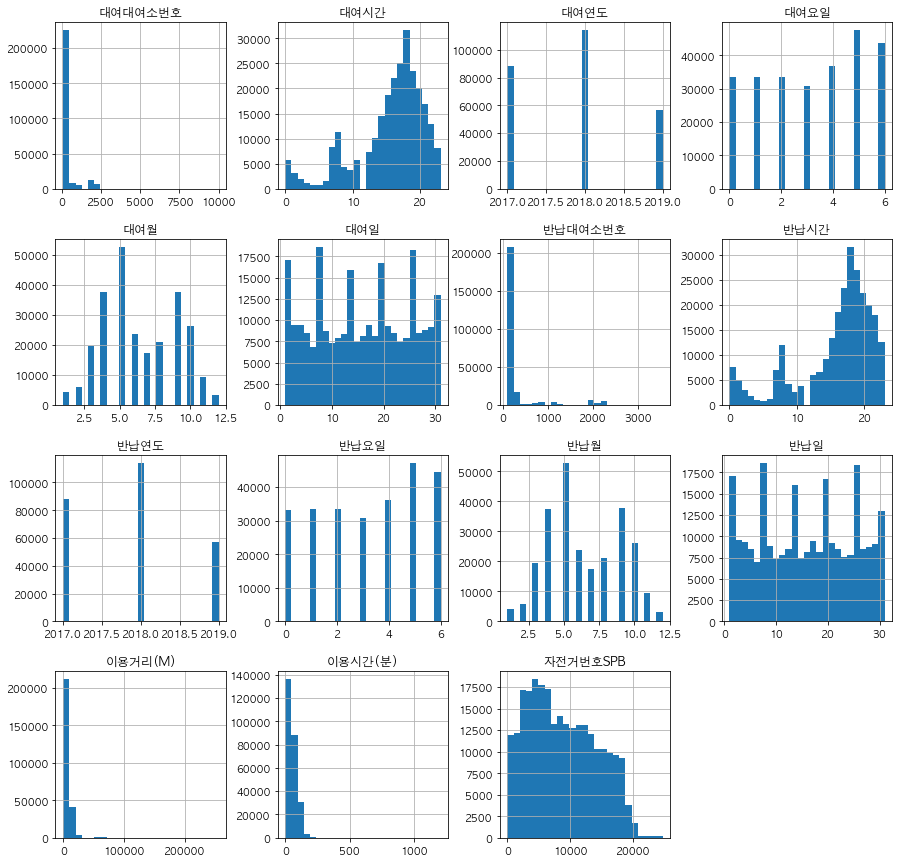

In [18]:
# 수치 데이터를 히스토그램으로 표현해 본다.
# 수치 데이터를 막대그래프로 표현하기 위해서는 도수분포표를 만들고 이를 시각화 하는 것이 히스토그램이다.
df.hist(figsize = (15,15), bins=25)

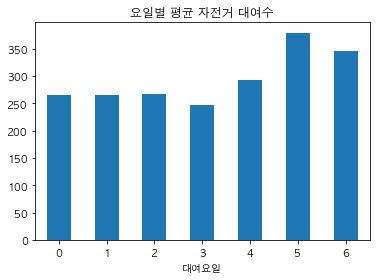

In [19]:
df_rent.groupby('대여요일')['대여수'].mean().plot.bar(
    title="요일별 평균 자전거 대여수", rot=0)

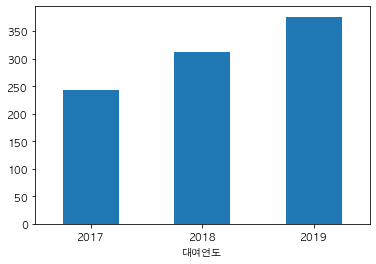

In [20]:
df_rent.groupby('대여연도')['대여수'].mean().plot.bar(rot=0)

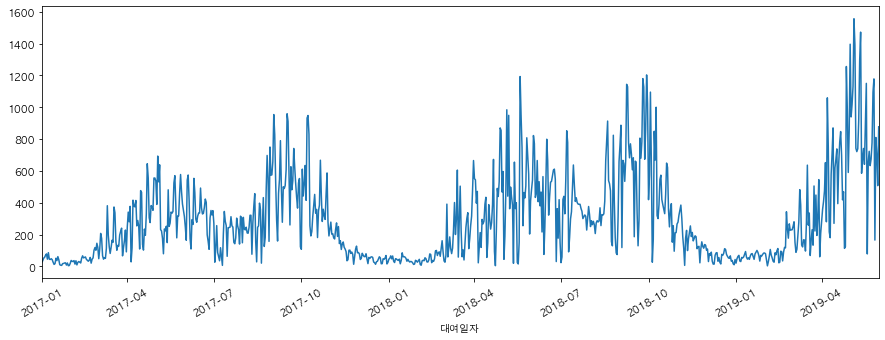

In [21]:
df_rent.groupby('대여일자')['대여수'].mean().plot(rot=30, figsize=(15, 5))

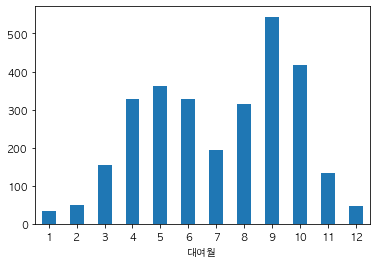

In [22]:
df_rent_2017 = df_rent[df_rent["대여연도"] == 2017]
df_rent_2017.groupby('대여월')['대여수'].mean().plot.bar(rot=0)

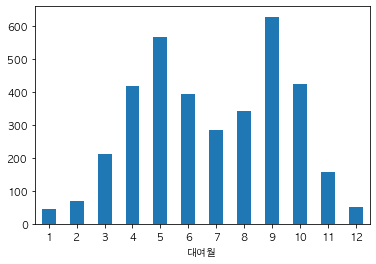

In [23]:
df_rent.groupby('대여월')['대여수'].mean().plot.bar(rot=0)

In [24]:
# 대여연도와 월별 대여수 평균을 구한다.
df_rent.groupby('대여연월')['대여수'].mean()

대여연월
2017-01     33.000000
2017-02     49.000000
2017-03    153.322581
2017-04    327.300000
2017-05    362.483871
2017-06    328.833333
2017-07    194.700000
2017-08    313.903226
2017-09    544.100000
2017-10    418.225806
2017-11    133.766667
2017-12     46.290323
2018-01     40.516129
2018-02     56.928571
2018-03    231.516129
2018-04    351.133333
2018-05    474.612903
2018-06    461.066667
2018-07    374.193548
2018-08    368.000000
2018-09    712.500000
2018-10    429.806452
2018-11    178.600000
2018-12     57.806452
2019-01     63.258065
2019-02    105.250000
2019-03    248.967742
2019-04    576.600000
2019-05    867.258065
Name: 대여수, dtype: float64

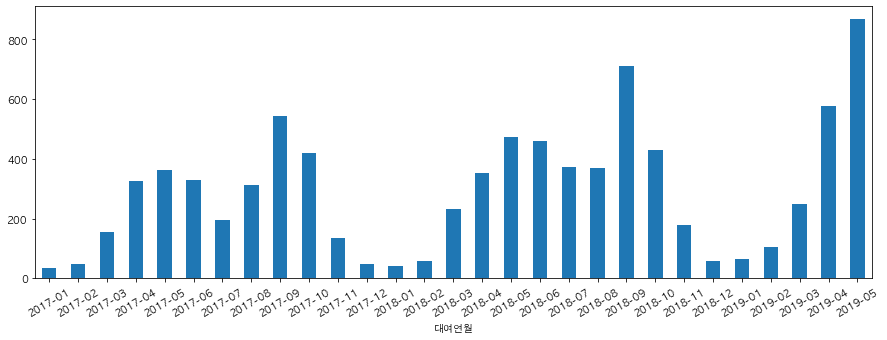

In [25]:
df_rent.groupby('대여연월')['대여수'].mean().plot.bar(rot=30, figsize=(15, 5))

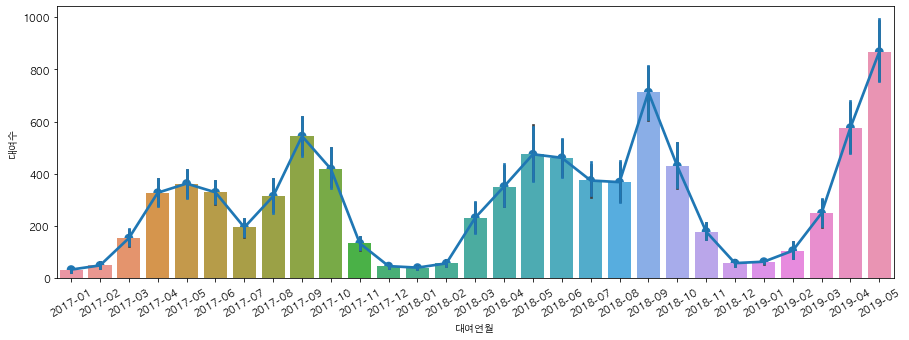

In [26]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=30)
sns.barplot(data=df_rent, x="대여연월", y="대여수")
sns.pointplot(data=df_rent, x="대여연월", y="대여수")

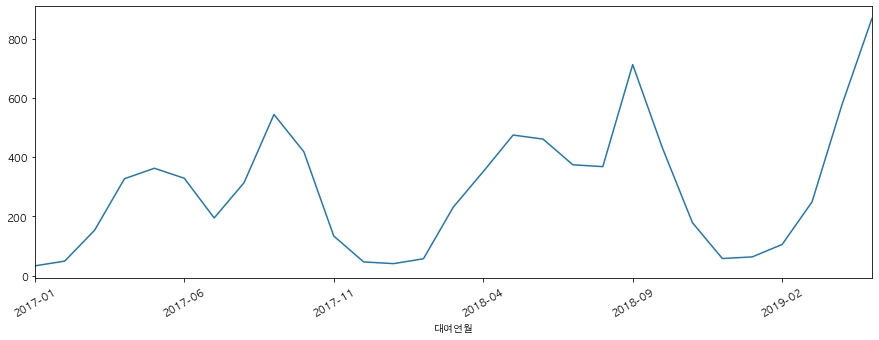

In [27]:
df_rent.groupby('대여연월')['대여수'].mean().plot(rot=30, figsize=(15, 5))

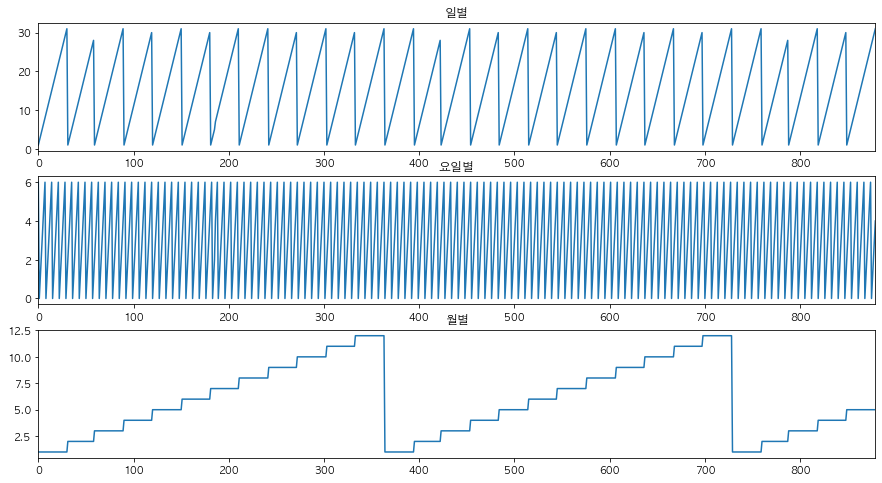

In [28]:
fig,axs = plt.subplots(3,1)

df_rent["대여일"].plot(figsize = (15,8), title = "일별", ax = axs[0])
df_rent["대여요일"].plot(figsize = (15,8), title = "요일별", ax = axs[1])
df_rent["대여월"].plot(figsize = (15,8), title = "월별", ax = axs[2])

In [29]:
df_rent_day = df_rent.groupby(["대여일자"])["대여수"].mean()
df_rent_day.head()

대여일자
2017-01-01    24
2017-01-02    34
2017-01-03    51
2017-01-04    56
2017-01-05    69
Name: 대여수, dtype: int64

In [30]:
df_rent_month = df_rent.groupby(["대여연월"])["대여수"].mean()
df_rent_month.head()

대여연월
2017-01     33.000000
2017-02     49.000000
2017-03    153.322581
2017-04    327.300000
2017-05    362.483871
Name: 대여수, dtype: float64

## Simple Moving Average

In [31]:
# Determine rolling statistics
# 30일치 rolling mean을 구해서 시각화 합니다.
rolmean = df_rent_day.rolling(window=12).mean() 
# window size 30 denotes 30 days, giving rolling mean at monthly level
rolstd = df_rent_day.rolling(window=12).std()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

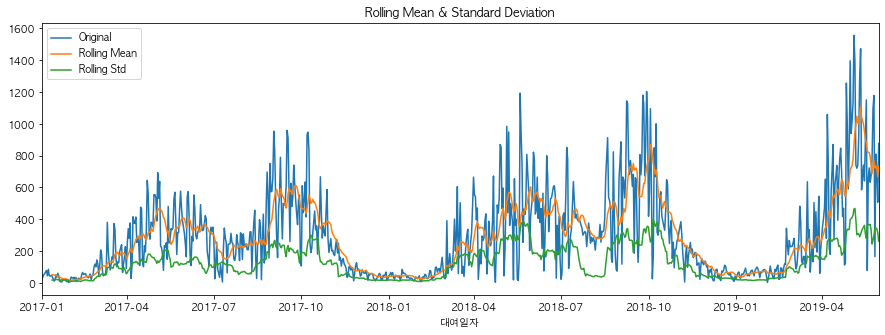

In [32]:
df_rent_day.plot(label='Original')
rolmean.plot(label='Rolling Mean')
rolstd.plot(label='Rolling Std', figsize=(15, 5))

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

## Weighted Moving Average
* exponentially-weighted-windows
* [Computational tools — pandas 0.25.0 documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows)

In [33]:
df_rent['WMA12'] = df_rent['대여수'].ewm(span=12).mean()
df_rent['WMA6'] = df_rent['대여수'].ewm(span=6).mean()

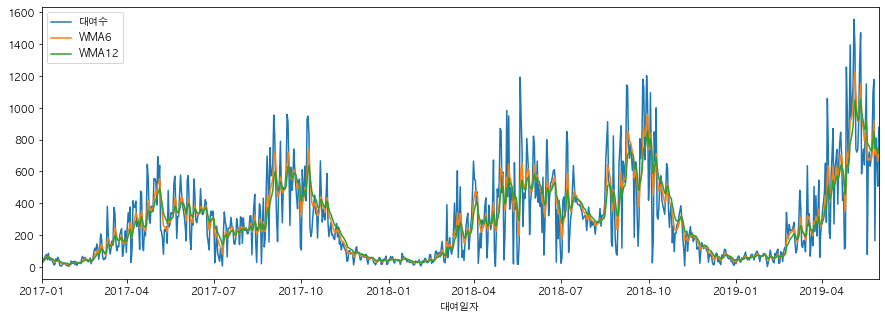

In [34]:
df_rent[['대여일자', '대여수', 'WMA6','WMA12']].plot(x='대여일자', figsize=(15,5))

## Simple Exponential Smoothing

In [35]:
# 데이터셋을 train과 test 로 나눈다.
train = pd.DataFrame(df_rent_day[:800])
test = pd.DataFrame(df_rent_day[800:])

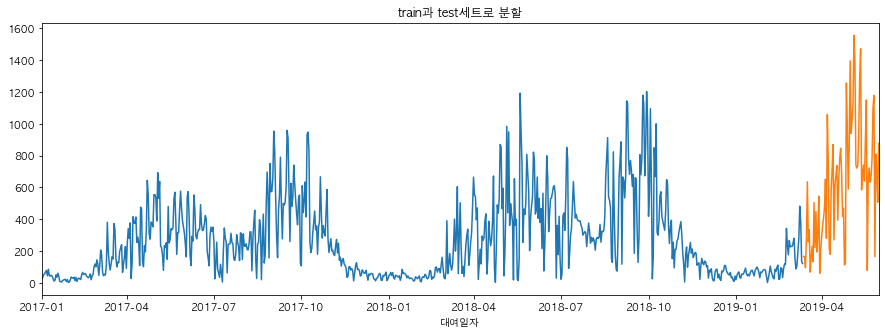

In [36]:
train["대여수"].plot(figsize=(15,5))
test["대여수"].plot(title='train과 test세트로 분할')

In [37]:
from statsmodels.tsa.api import SimpleExpSmoothing
ses_model = SimpleExpSmoothing(pd.np.asarray(train['대여수'].astype(np.float)))

In [38]:
ses_result = ses_model.fit()
ses_result

In [39]:
y_hat = test.copy()
y_hat['SES'] = ses_result.forecast(len(test))
y_hat['SES'][:3]

대여일자
2019-03-13    220.085243
2019-03-14    220.085243
2019-03-15    220.085243
Name: SES, dtype: float64

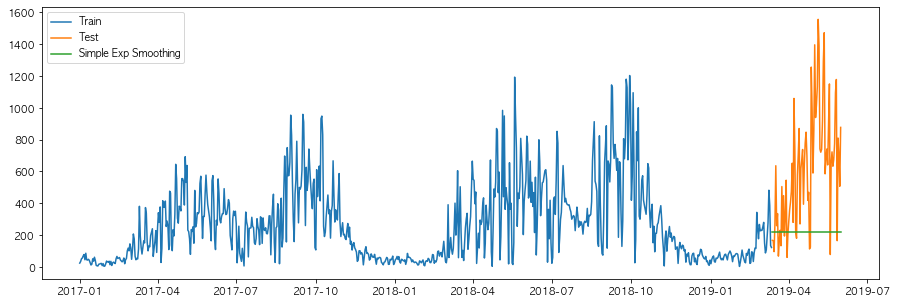

In [40]:
plt.figure(figsize=(15,5))
plt.plot(train['대여수'], label='Train')
plt.plot(test['대여수'], label='Test')
plt.plot(y_hat['SES'], label='Simple Exp Smoothing')
plt.legend()

In [41]:
rmse = {}
# root mean squared error 로 오차를 계산해 본다.
rmse["SES"] = np.sqrt(np.square(test['대여수'] - y_hat['SES']).mean())
rmse["SES"]

539.4304391609384

## Expanding

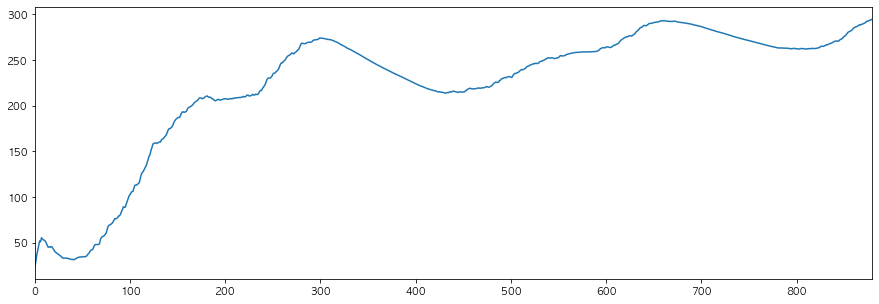

In [42]:
# Expanding
df_rent['대여수'].expanding(min_periods=1).mean().plot(figsize=(15,5))

### Dickey–Fuller test

In [43]:
# 결과의 p-value 가 5%를 벗어나기 때문에 non-stationary 데이터라고 볼 수 있다.
# AIC - 회귀에서 예측변수(predictor)를 고를 때 사용하며, 아카이케(Akaike)의 정보 기준(AIC; Akaike’s information Criterion)
# AIC 출처 : [8.6 추정과 차수 선택 | Forecasting: Principles and Practice](https://otexts.com/fppkr/arima-estimation.html)
from statsmodels.tsa.stattools import adfuller
# Perform Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df_rent['대여수'], autolag='AIC')
dfoutput = pd.Series(
    dftest[0:4], 
    index=['Test Statistic',
           'p-value',
           '#Lags Used',
           'Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                  -1.562753
p-value                          0.502272
#Lags Used                      19.000000
Number of Observations Used    860.000000
Critical Value (1%)             -3.437977
Critical Value (5%)             -2.864907
Critical Value (10%)            -2.568563
dtype: float64


## Time Series data Decomposition(시계열 데이터 분해)
* Seasonal
* Trend
* Residual(random, remainder)

## Additive Model

* 값을 더해서 구한다.

$y_t = Level + Trend + Seasonality + Noise$


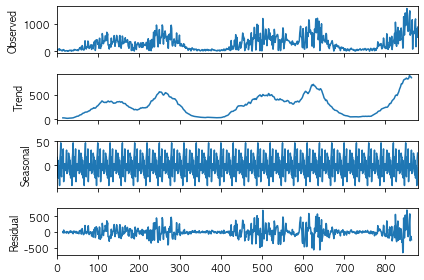

In [44]:
from statsmodels.api import tsa

# Additive model
res = tsa.seasonal_decompose(df_rent["대여수"], freq=30, model="additive")
fig = res.plot()

## Multiplicative Model
*  값을 곱해서 구한다.

$y_t = Level \times Trend \times Seasonality \times Noise$

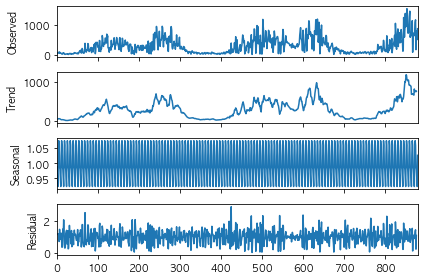

In [45]:
# multiplicative
res = tsa.seasonal_decompose(df_rent["대여수"], freq=7, model="multiplicative")
fig = res.plot()

## ACF, PACF
* ARIMA 모델 사용시 lag 값에 따른 절단값으로 p,d,q값을 찾기 위해 그려본다.
* AUTO.ARIMA 함수를 사용하여 최적화된 파라미터를 찾을 수도 있다.

## ACF : 자기상관 함수 AutoCorrelation Function

## PACF : 부분 자기상관 함수 Partial AutoCorrelation Function 

* p – Lag value where the PACF chart crosses the upper confidence interval for the first time.
* q – Lag value where the ACF chart crosses the upper confidence interval for the first time.

* 참고 : [Detecting stationarity in time series data - Towards Data Science](https://towardsdatascience.com/detecting-stationarity-in-time-series-data-d29e0a21e638)

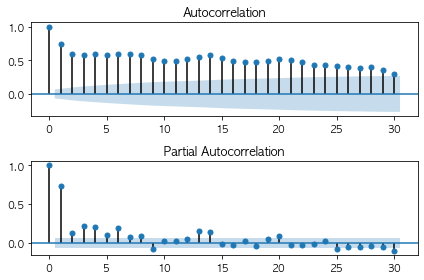

In [46]:
from statsmodels.graphics import tsaplots
# lag는 0부터 설정할 수 있으나 너무 낮으면  그래프를 보기 어렵다.
# 0은 제외하고 본다.

ax1 = plt.subplot(211)
tsaplots.plot_acf(df_rent["대여수"], lags=30, ax=ax1)
ax2 = plt.subplot(212)
tsaplots.plot_pacf(df_rent["대여수"], lags=30, ax=ax2)
plt.tight_layout()

## Seasonal ARIMA
* 참고 : [An End-to-End Project on Time Series Analysis and Forecasting with Python](https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b)

### Trend
* p: Trend autoregression order. AR(p)모형의 p차수
* d: Trend difference order. 트랜드를 제거하여 안정시계열로 만들기 위한 I(d)의 차분 차수 d
* q: Trend moving average order. MA(q)의 q차수 

### Seasonal
* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period.

In [47]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
m = 7
print(pdq)
seasonal_pdq = [(x[0], x[1], x[2], m) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


[(0, 0, 0, 7),
 (0, 0, 1, 7),
 (0, 1, 0, 7),
 (0, 1, 1, 7),
 (1, 0, 0, 7),
 (1, 0, 1, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7)]

In [48]:
# Grid Search와 유사하게 최적의 파라메터 값을 찾는다.
y = train['대여수'].to_list()

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
            results = mod.fit()
            print(f"ARIMA{param}x{param_seasonal}{m} - AIC:{results.aic}")
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:11651.362904744394
ARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:11167.578431389033
ARIMA(0, 0, 0)x(0, 1, 0, 7)7 - AIC:10789.102520389606
ARIMA(0, 0, 0)x(0, 1, 1, 7)7 - AIC:10430.858999773205
ARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:10726.539879937965
ARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:10510.169109404145
ARIMA(0, 0, 0)x(1, 1, 0, 7)7 - AIC:10485.022243536696
ARIMA(0, 0, 0)x(1, 1, 1, 7)7 - AIC:10418.348936270359
ARIMA(0, 0, 1)x(0, 0, 0, 7)7 - AIC:11064.188558148528
ARIMA(0, 0, 1)x(0, 0, 1, 7)7 - AIC:10799.602116996528
ARIMA(0, 0, 1)x(0, 1, 0, 7)7 - AIC:10658.392404068603
ARIMA(0, 0, 1)x(0, 1, 1, 7)7 - AIC:10241.506221280757
ARIMA(0, 0, 1)x(1, 0, 0, 7)7 - AIC:10569.915189691237
ARIMA(0, 0, 1)x(1, 0, 1, 7)7 - AIC:10319.391696910174
ARIMA(0, 0, 1)x(1, 1, 0, 7)7 - AIC:10339.701526516992
ARIMA(0, 0, 1)x(1, 1, 1, 7)7 - AIC:10230.49028716853
ARIMA(0, 1, 0)x(0, 0, 0, 7)7 - AIC:10474.025773887448
ARIMA(0, 1, 0)x(0, 0, 1, 7)7 - AIC:10390.368709142038
ARIMA(0, 1, 0)x(0, 1, 0, 7)7 

In [49]:
# ARIMA(p,d,q)(P,D,Q)m
# ARIMA(1, 1, 1)x(0, 1, 1, 7)7 - AIC:10083.141308943608
arima = tsa.statespace.SARIMAX(train['대여수'].to_list(),
                                  order=(1,1,1),
                                  seasonal_order=(0,1,1,7),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
# 학습
arima_result = arima.fit()
print(arima_result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3993      0.029     13.572      0.000       0.342       0.457
ma.L1         -0.8950      0.018    -50.418      0.000      -0.930      -0.860
ma.S.L7       -1.0407      0.010   -106.367      0.000      -1.060      -1.022
sigma2      2.057e+04    738.702     27.847      0.000    1.91e+04     2.2e+04


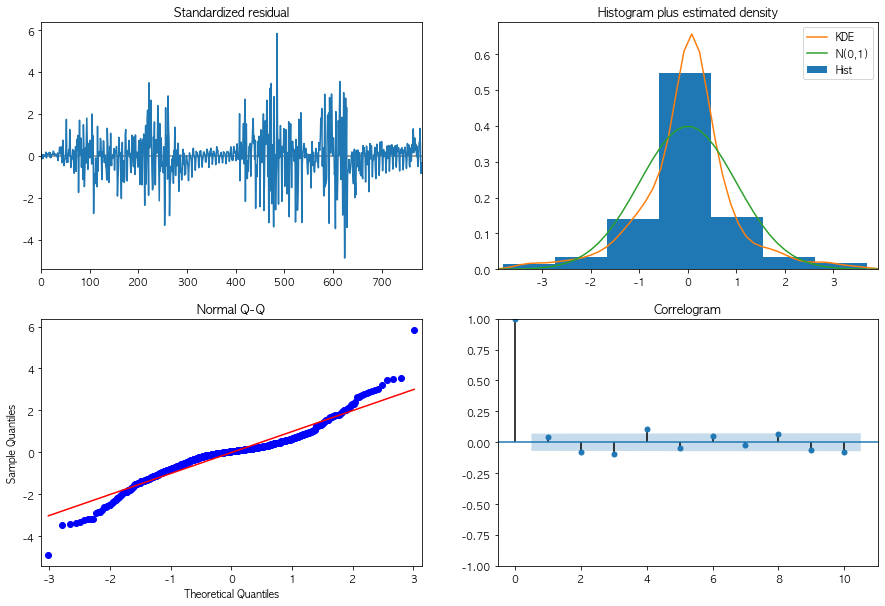

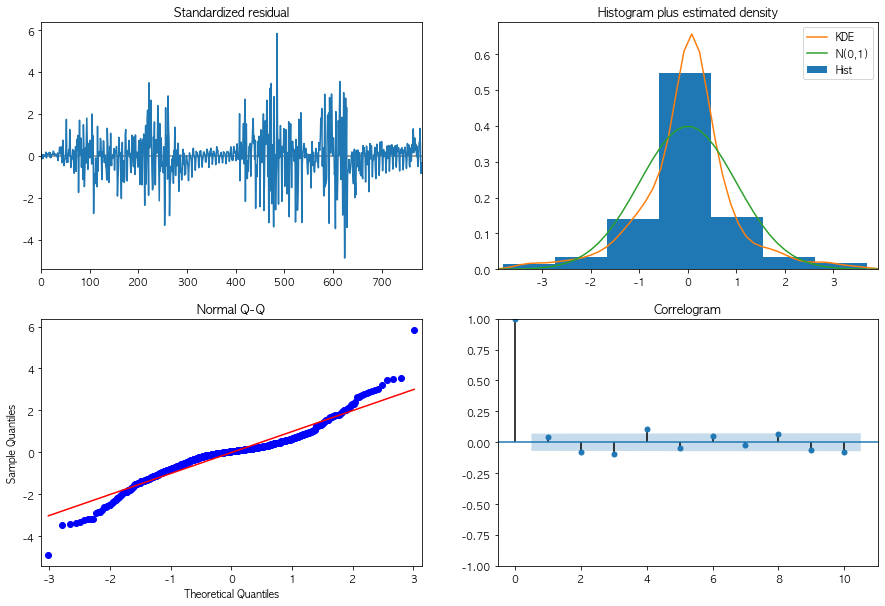

In [50]:
arima_result.plot_diagnostics(figsize=(15, 10))

In [51]:
# 예측
predict_value = arima_result.predict(start=801, end=880, dynamic=True)
predict_value[:5]

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


array([153.01022897, 184.72258613, 263.36188214, 238.8739851 ,
       176.95805759])

In [52]:
y_hat['ARIMA'] = predict_value
y_hat['ARIMA'].head()

대여일자
2019-03-13    153.010229
2019-03-14    184.722586
2019-03-15    263.361882
2019-03-16    238.873985
2019-03-17    176.958058
Name: ARIMA, dtype: float64

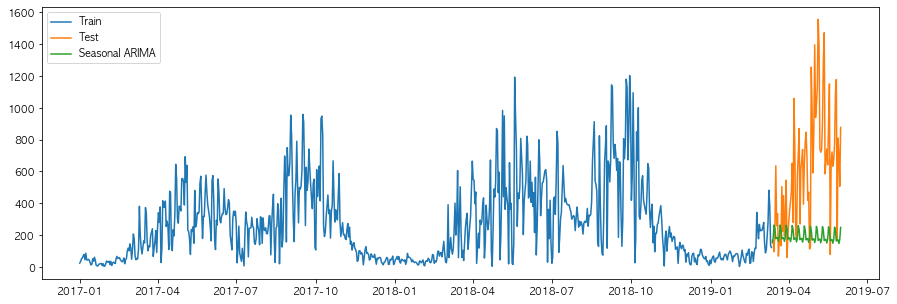

In [53]:
plt.figure(figsize=(15,5))
plt.plot(train['대여수'], label='Train')
plt.plot(test['대여수'], label='Test')
plt.plot(y_hat['ARIMA'], label='Seasonal ARIMA')
plt.legend()

In [54]:
# root mean squared error 로 오차를 계산해 본다.
rmse["ARIMA"] = np.sqrt(np.square(test['대여수'] - y_hat['ARIMA']).mean())
rmse["ARIMA"]

560.3622058061144

In [55]:
rmse

{'SES': 539.4304391609384, 'ARIMA': 560.3622058061144}

## fbprophet
* 공식문서 : https://facebook.github.io/prophet/docs/quick_start.html#python-api
* https://anaconda.org/conda-forge/fbprophet
* conda install -c conda-forge fbprophet
* pip로 설치한다면 pystan이 설치되어 있어야 함

In [56]:
# !pip install pystan
# !pip install fbprophet

In [57]:
from fbprophet import Prophet

In [58]:
p_train = train.reset_index().copy()
p_train.columns = ["ds", "y"]
p_train["y"] = np.log(p_train["y"])
p_train.head()

ds         y
0  2017-01-01  3.178054
1  2017-01-02  3.526361
2  2017-01-03  3.931826
3  2017-01-04  4.025352
4  2017-01-05  4.234107

In [59]:
m = Prophet(daily_seasonality=True)
m.fit(p_train)

//anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [60]:
future = m.make_future_dataframe(periods=80)
future.tail()

ds
875 2019-05-27
876 2019-05-28
877 2019-05-29
878 2019-05-30
879 2019-05-31

In [61]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
875 2019-05-27  6.216959    5.357921    7.068767
876 2019-05-28  6.310166    5.412459    7.125961
877 2019-05-29  6.342956    5.536691    7.191762
878 2019-05-30  6.326398    5.440003    7.137967
879 2019-05-31  6.475939    5.664080    7.333702

In [62]:
df_forecast = forecast[['ds', 'yhat']]
df_plt_forecast = df_forecast.set_index('ds')
df_plt_forecast.shape

(880, 1)

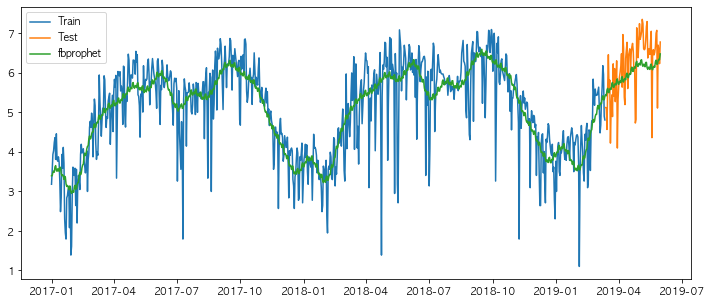

In [63]:
plt.figure(figsize=(12,5))
plt.plot(np.log(train['대여수']), label='Train')
plt.plot(np.log(test['대여수']), label='Test')
plt.plot(df_plt_forecast['yhat'], label='fbprophet')
plt.legend()

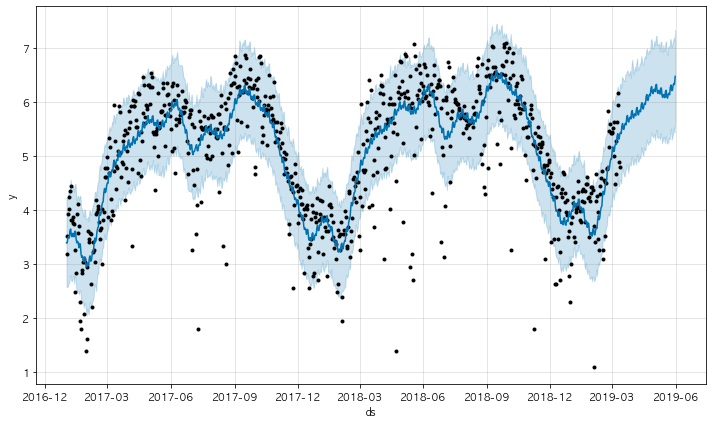

In [64]:
fig1 = m.plot(forecast)

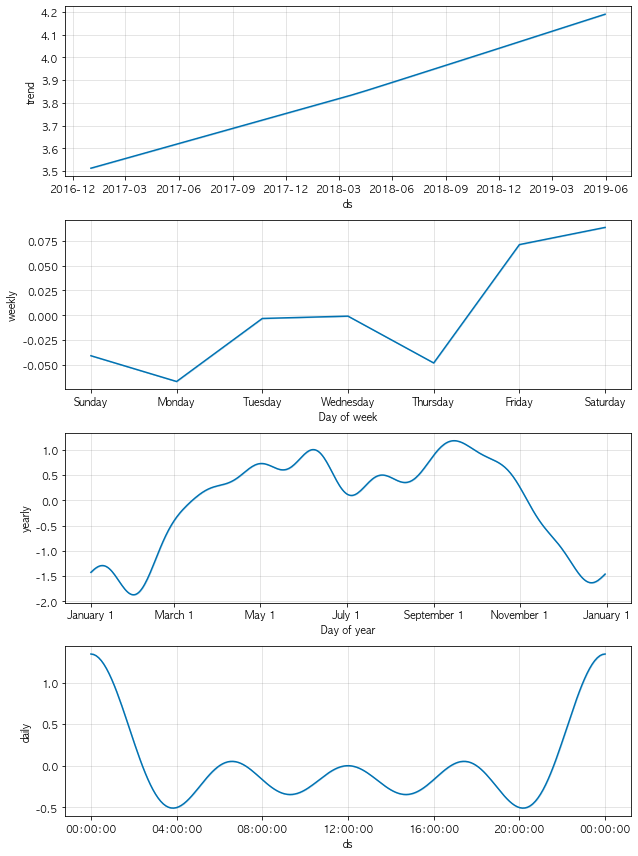

In [65]:
fig2 = m.plot_components(forecast)

In [66]:
# plotly 가 설치되어 있지 않다면 아래의 명령어로 설치가 필요하다.
# 아나콘다에 설치 시 : conda install -c plotly plotly 
from fbprophet.plot import plot_plotly
import plotly.offline as py

py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)